In [1]:
# step1_data_cleaning.py
import pandas as pd

        # Load the file
df = pd.read_csv('Pizza_Sale - pizza_sales.csv')

print("🔍 Original shape:", df.shape)

# Drop duplicates
df = df.drop_duplicates()
print("✅ Removed duplicates. New shape:", df.shape)

# Drop rows with missing essential fields
df = df.dropna(subset=['pizza_name_id', 'pizza_category','pizza_ingredients','pizza_name'])

 # Convert 'Date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['order_date'])

# Convert Quantity Sold to numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows with invalid quantity
df = df.dropna(subset=['quantity'])
        # df = df[df['Quantity Sold'] > 0]

print("✅ Cleaned shape:", df.shape)

        # Save cleaned data
df.to_csv('cleaneddata.csv', index=False)


  


🔍 Original shape: (48620, 12)
✅ Removed duplicates. New shape: (48620, 12)
✅ Cleaned shape: (19528, 12)


In [2]:

# Assuming your DataFrame is named df and the column is 'order_time'
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_16944\3053409025.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 19528 entries, 0 to 46440
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           19528 non-null  int64         
 1   order_id           19528 non-null  int64         
 2   pizza_name_id      19528 non-null  object        
 3   quantity           19528 non-null  int64         
 4   order_date         19528 non-null  datetime64[ns]
 5   order_time         19528 non-null  datetime64[ns]
 6   unit_price         19528 non-null  float64       
 7   total_price        19521 non-null  float64       
 8   pizza_size         19528 non-null  object        
 9   pizza_category     19528 non-null  object        
 10  pizza_ingredients  19528 non-null  object        
 11  pizza_name         19528 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 1.9+ MB


In [3]:
# step2_feature_engineering.py
import pandas as pd
import holidays


df['day_of_week'] = df['order_date'].dt.dayofweek
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.isocalendar().week
df['year'] = df['order_date'].dt.year
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    
import holidays
indian_holidays = holidays.US()
df['is_holiday'] = df['order_date'].apply(lambda x: 'Yes' if x in indian_holidays else 'No')

# Example: Assume weekends are promotional
df['Is_Promotion'] =df['is_weekend']

# View the enhanced DataFrame
print(df[['order_date', 'month', 'week', 'year', 'day_of_week', 'is_weekend', 'is_holiday', 'Is_Promotion']].head())





  order_date  month  week  year  day_of_week  is_weekend is_holiday  \
0 2015-01-01      1     1  2015            3           0        Yes   
1 2015-01-01      1     1  2015            3           0        Yes   
2 2015-01-01      1     1  2015            3           0        Yes   
3 2015-01-01      1     1  2015            3           0        Yes   
4 2015-01-01      1     1  2015            3           0        Yes   

   Is_Promotion  
0             0  
1             0  
2             0  
3             0  
4             0  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

# Check basic structure
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19528 entries, 0 to 46440
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           19528 non-null  int64         
 1   order_id           19528 non-null  int64         
 2   pizza_name_id      19528 non-null  object        
 3   quantity           19528 non-null  int64         
 4   order_date         19528 non-null  datetime64[ns]
 5   order_time         19528 non-null  datetime64[ns]
 6   unit_price         19528 non-null  float64       
 7   total_price        19521 non-null  float64       
 8   pizza_size         19528 non-null  object        
 9   pizza_category     19528 non-null  object        
 10  pizza_ingredients  19528 non-null  object        
 11  pizza_name         19528 non-null  object        
 12  day_of_week        19528 non-null  int32         
 13  month              19528 non-null  int32         
 14  week       

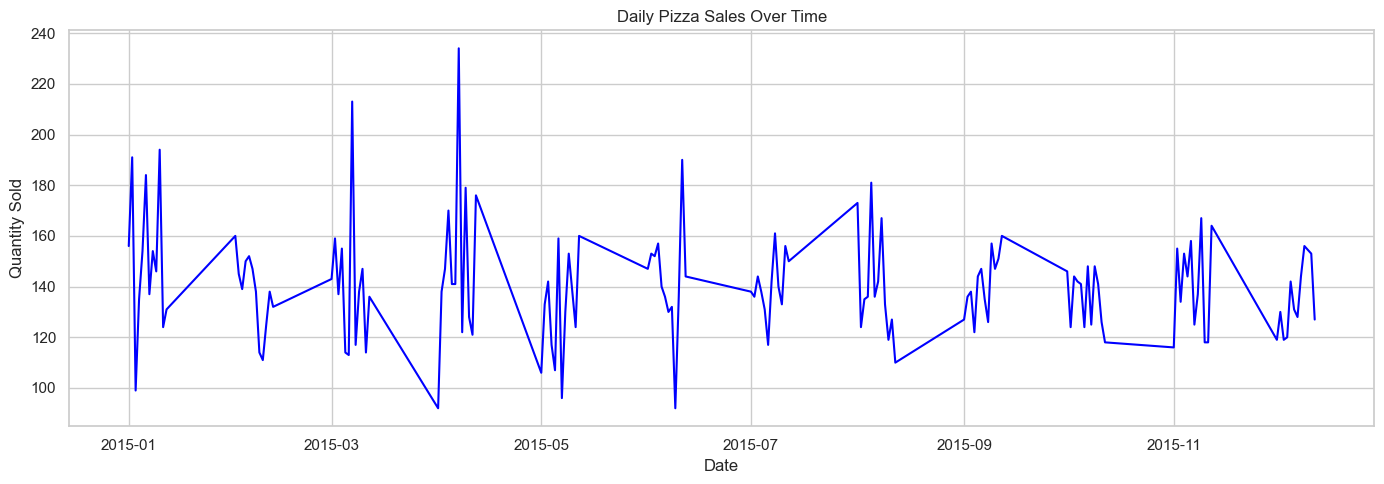

In [5]:
# Aggregate quantity sold by date
daily_sales = df.groupby('order_date')['quantity'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(daily_sales['order_date'], daily_sales['quantity'], color='blue')
plt.title('Daily Pizza Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\3716813152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


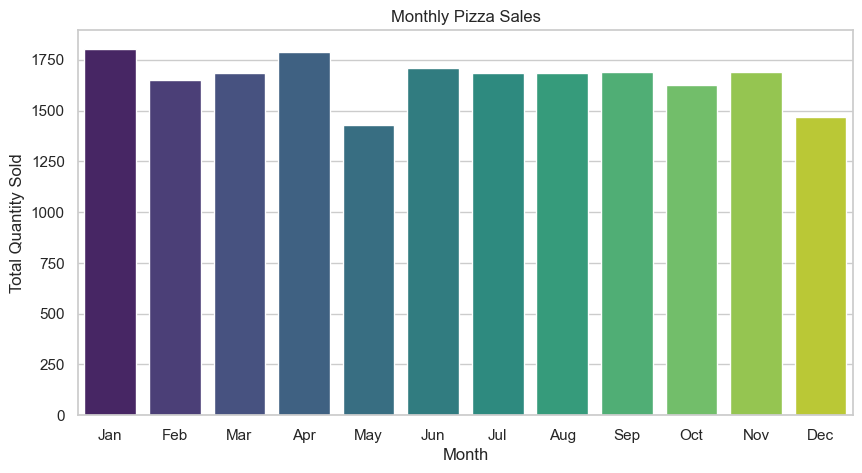

In [6]:
monthly_sales = df.groupby('month')['quantity'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Pizza Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\77026115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_names, y=dow_sales.values, palette='coolwarm')


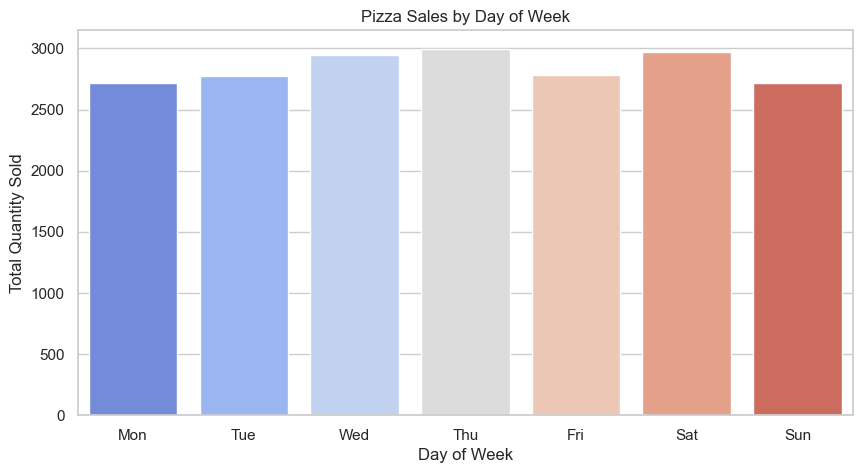

In [7]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_sales = df.groupby('day_of_week')['quantity'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=day_names, y=dow_sales.values, palette='coolwarm')
plt.title('Pizza Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\3790096847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='Set2')


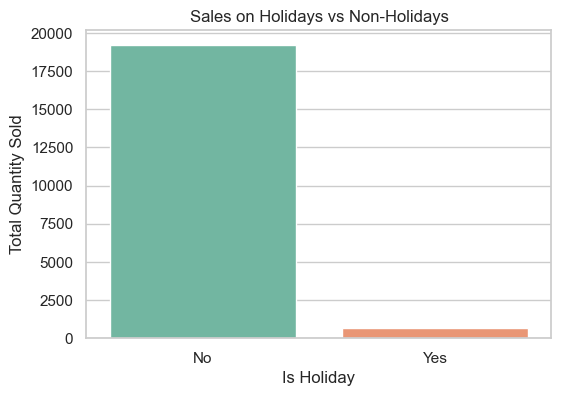

In [8]:
holiday_sales = df.groupby('is_holiday')['quantity'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='Set2')
plt.title('Sales on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Total Quantity Sold')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\512514581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index.map({0: 'No', 1: 'Yes'}),


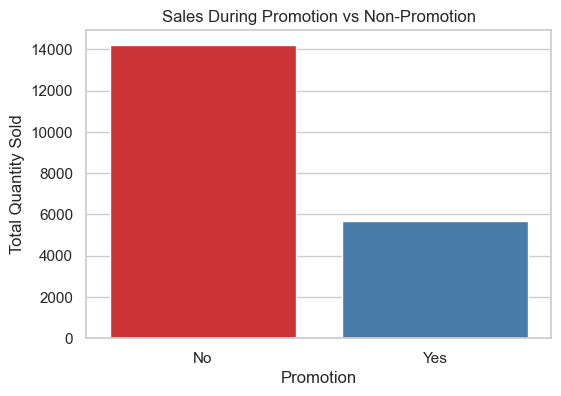

In [9]:
promo_sales = df.groupby('Is_Promotion')['quantity'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=promo_sales.index.map({0: 'No', 1: 'Yes'}), 
            y=promo_sales.values, palette='Set1')
plt.title('Sales During Promotion vs Non-Promotion')
plt.xlabel('Promotion')
plt.ylabel('Total Quantity Sold')
plt.show()


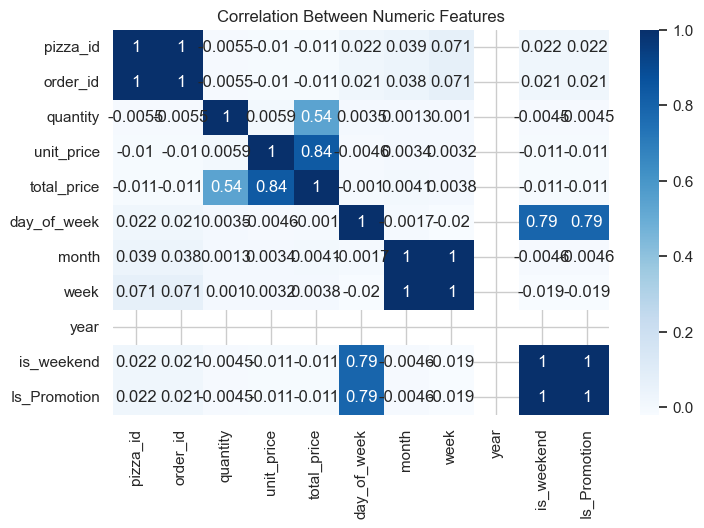

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Between Numeric Features')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\3873107948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='mako')


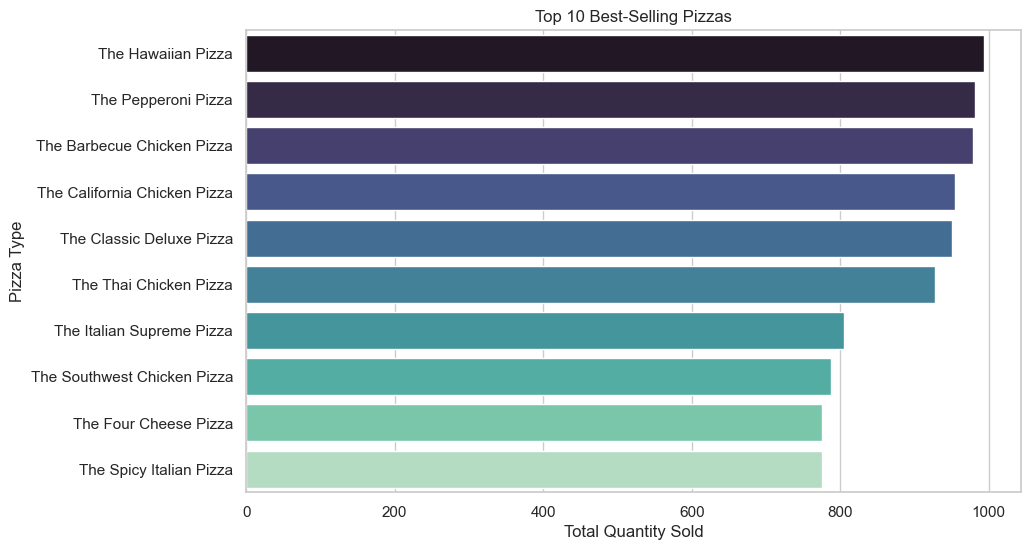

In [12]:
top_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='mako')
plt.title('Top 10 Best-Selling Pizzas')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Type')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16944\436233568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='pastel')


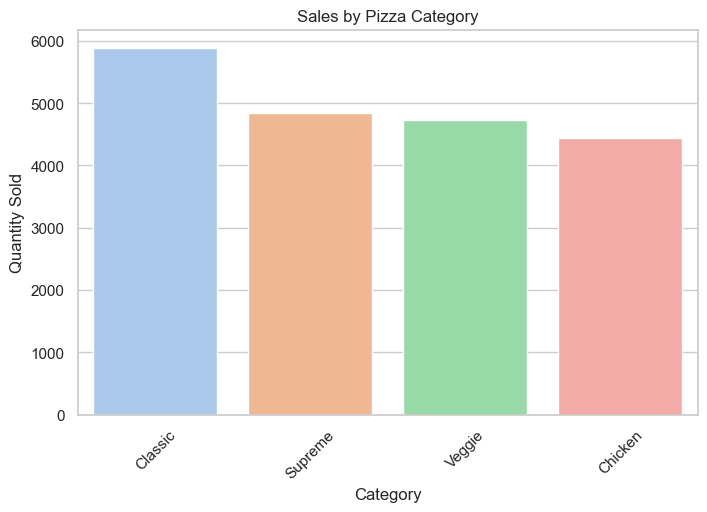

In [13]:
category_sales = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='pastel')
plt.title('Sales by Pizza Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


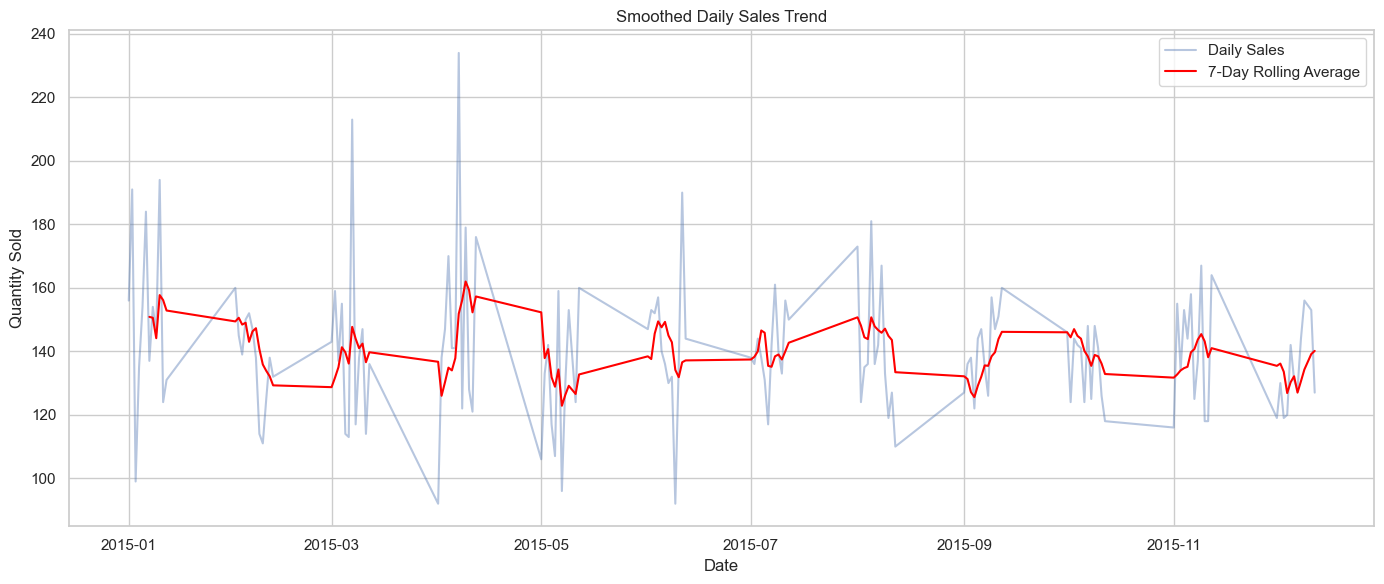

In [15]:
daily_sales['Rolling_Avg'] = daily_sales['quantity'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Daily Sales', alpha=0.4)
plt.plot(daily_sales['order_date'], daily_sales['Rolling_Avg'], label='7-Day Rolling Average', color='red')
plt.title('Smoothed Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.tight_layout()
plt.show()


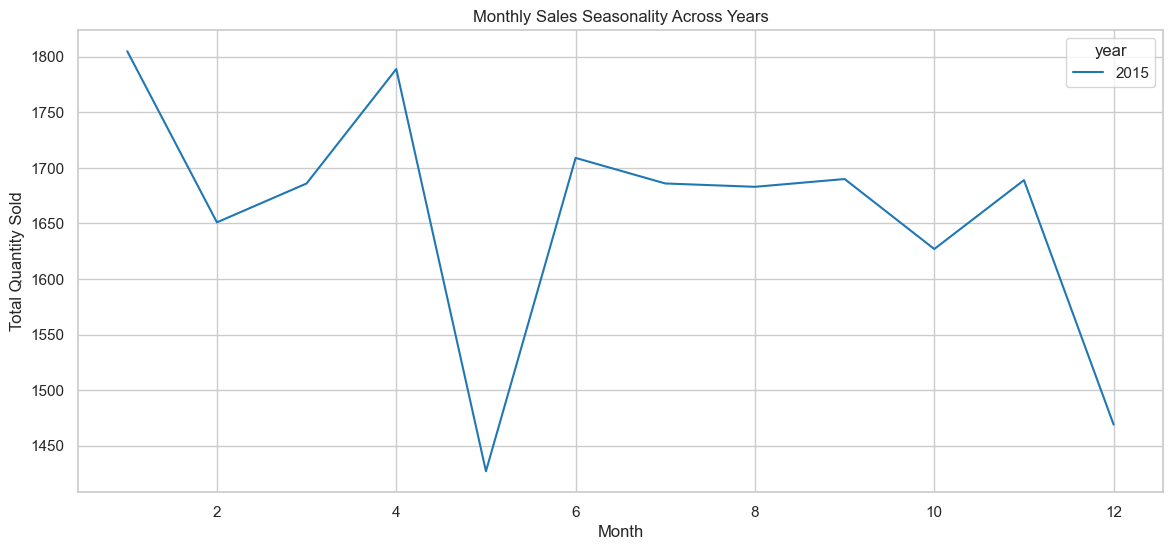

In [16]:
monthly_trend = df.groupby(['year', 'month'])['quantity'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='month', y='quantity', hue='year', palette='tab10')
plt.title('Monthly Sales Seasonality Across Years')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


In [18]:
# Resample data if needed
ts = df.groupby('order_date')['quantity'].sum().asfreq('D').fillna(0)


In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Fit ARIMA(p,d,q)
model = ARIMA(ts, order=(5,1,2))  # You can use AIC/BIC to tune
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=7)
print("ARIMA Forecast:", forecast.values)

# Evaluate (last 30 days)
mape_arima = mean_absolute_percentage_error(ts[-37:-7], model_fit.predict(start=len(ts)-37, end=len(ts)-8))
print(f"ARIMA MAPE: {mape_arima:.2%}")


ARIMA Forecast: [100.5736727  112.16431481 103.56945691 116.04678344 127.41398337
 117.43165545 105.00510086]
ARIMA MAPE: 4573273598236245504.00%


c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(p,d,q)(P,D,Q,s)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7))  # Weekly seasonality
sarima_fit = model.fit()

# Forecast
sarima_forecast = sarima_fit.forecast(steps=7)
print("SARIMA Forecast:", sarima_forecast.values)

# Evaluate
mape_sarima = mean_absolute_percentage_error(ts[-37:-7], sarima_fit.predict(start=len(ts)-37, end=len(ts)-8))
print(f"SARIMA MAPE: {mape_sarima:.2%}")


SARIMA Forecast: [111.46310019 100.76588155  93.0519556   89.36332824  85.027195
  72.64158473  73.17472631]
SARIMA MAPE: 4263771713452692992.00%


In [21]:
from prophet import Prophet

df_prophet = ts.reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Evaluate
true = df_prophet.set_index('ds')[-30:]
pred = forecast.set_index('ds').loc[true.index]
mape_prophet = mean_absolute_percentage_error(true['y'], pred['yhat'])
print(f"Prophet MAPE: {mape_prophet:.2%}")


c:\Users\HP\Desktop\capstone\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:19:37 - cmdstanpy - INFO - Chain [1] start processing
16:19:37 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE: 15579436409410121728.00%


In [22]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Container for forecasts
all_forecasts = []

# Group sales by pizza type
for pizza_type, group in df.groupby('pizza_name'):
    df_pizza = group.groupby('order_date')['quantity'].sum().reset_index()
    df_pizza.columns = ['ds', 'y']

    if len(df_pizza) > 30:  # skip pizzas with too little data
        model = Prophet()
        model.fit(df_pizza)

        future = model.make_future_dataframe(periods=7)
        forecast = model.predict(future)

        # Get only the future forecast
        future_forecast = forecast[['ds', 'yhat']].tail(7)
        future_forecast['pizza_name'] = pizza_type
        future_forecast.rename(columns={'yhat': 'Predicted Quantity'}, inplace=True)

        all_forecasts.append(future_forecast)

# Combine all forecasts
forecast_df = pd.concat(all_forecasts)

# Aggregate predicted quantity over 7 days
pizza_forecast_7d = forecast_df.groupby('pizza_name')['Predicted Quantity'].sum().reset_index()
pizza_forecast_7d['Predicted Quantity'] = pizza_forecast_7d['Predicted Quantity'].round(0)

print(pizza_forecast_7d)


17:01:31 - cmdstanpy - INFO - Chain [1] start processing
17:01:31 - cmdstanpy - INFO - Chain [1] done processing
17:01:32 - cmdstanpy - INFO - Chain [1] start processing
17:01:32 - cmdstanpy - INFO - Chain [1] done processing
17:01:33 - cmdstanpy - INFO - Chain [1] start processing
17:01:33 - cmdstanpy - INFO - Chain [1] done processing
17:01:33 - cmdstanpy - INFO - Chain [1] start processing
17:01:33 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:35 - cmdstanpy - INFO - Chain [1] start processing
17:01:35 - cmdstanpy - INFO - Chain [1] done processing
17:01:35 - cmdstanpy - INFO - Chain [1] start processing
17:01:35 - cmdstanpy - INFO - Chain [1] done processing
17:01:36 - cmdstanpy - INFO - Chain [1] start processing
17:01:36 - cmdstanpy - INFO - Chain [1]

                                    pizza_name  Predicted Quantity
0                   The Barbecue Chicken Pizza                45.0
1                           The Big Meat Pizza                34.0
2                         The Brie Carre Pizza                13.0
3                          The Calabrese Pizza                22.0
4                 The California Chicken Pizza                45.0
5                    The Chicken Alfredo Pizza                20.0
6                      The Chicken Pesto Pizza                19.0
7                     The Classic Deluxe Pizza                42.0
8                        The Five Cheese Pizza                30.0
9                        The Four Cheese Pizza                38.0
10                             The Greek Pizza                28.0
11                      The Green Garden Pizza                20.0
12                          The Hawaiian Pizza                49.0
13                 The Italian Capocollo Pizza                

In [24]:
ingredients_df=pd.read_csv('Pizza_ingredients - Pizza_ingredients.csv')
merged = pd.merge(pizza_forecast_7d, ingredients_df, on='pizza_name')
merged['Total Ingredient Needed'] = merged['Predicted Quantity'] * merged['Items_Qty_In_Grams']

purchase_order = merged.groupby('pizza_ingredients')['Total Ingredient Needed'].sum().reset_index()
purchase_order.columns = ['pizza_ingredients', 'Required Quantity']
purchase_order['Required Quantity'] = purchase_order['Required Quantity'].round(2)

print(purchase_order)


          pizza_ingredients  Required Quantity
0              ?duja Salami             2640.0
1             Alfredo Sauce              900.0
2                 Anchovies             2210.0
3                Artichokes             7425.0
4                   Arugula              960.0
..                      ...                ...
59       Sun-dried Tomatoes             1200.0
60  Thai Sweet Chilli Sauce             2640.0
61                    Thyme               65.0
62                 Tomatoes            34440.0
63                 Zucchini             3180.0

[64 rows x 2 columns]


In [26]:
pizza_groups = df.groupby(['pizza_name', 'order_date'])['quantity'].sum().reset_index()
pizza_groups = pizza_groups.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)
pizza_groups 

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,12.0,9.0,3.0,7.0,15.0,3.0,2.0,13.0,5.0,6.0,...,6.0,5.0,3.0,9.0,9.0,5.0,3.0,4.0,8.0,1.0
2015-01-03,2.0,3.0,1.0,1.0,6.0,0.0,1.0,4.0,5.0,4.0,...,1.0,2.0,0.0,9.0,4.0,3.0,0.0,5.0,4.0,6.0
2015-01-04,2.0,3.0,0.0,2.0,3.0,3.0,2.0,8.0,7.0,6.0,...,4.0,8.0,6.0,10.0,4.0,4.0,6.0,1.0,3.0,5.0
2015-01-05,6.0,1.0,1.0,4.0,11.0,2.0,5.0,9.0,6.0,4.0,...,5.0,5.0,0.0,6.0,5.0,2.0,4.0,5.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-07,2.0,3.0,1.0,2.0,4.0,0.0,4.0,8.0,3.0,5.0,...,4.0,5.0,2.0,5.0,9.0,1.0,5.0,6.0,6.0,3.0
2015-12-08,5.0,3.0,3.0,3.0,6.0,3.0,3.0,10.0,2.0,6.0,...,6.0,4.0,2.0,6.0,10.0,2.0,3.0,7.0,7.0,3.0
2015-12-09,4.0,3.0,1.0,6.0,9.0,3.0,5.0,3.0,8.0,5.0,...,6.0,5.0,2.0,6.0,2.0,1.0,1.0,5.0,8.0,9.0


In [27]:
# Ensure daily frequency
pizza_groups = pizza_groups.asfreq('D')

In [28]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima(ts):
    model = ARIMA(ts, order=(1,1,1))  # You can tune this
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=7)
    return forecast.sum()


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sarima(ts):
    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=7)
    return forecast.sum()


In [30]:
from prophet import Prophet

def forecast_prophet(ts):
    df = ts.reset_index()
    df.columns = ['ds', 'y']
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    return forecast['yhat'][-7:].sum()


In [38]:
results = {
    'pizza_name': [],
    'ARIMA': [],
    'SARIMA': [],
    'PROPHET': []
    
}

for pizza in pizza_groups.columns:
    ts = pizza_groups[pizza]
    if ts.sum() < 30: continue  # Skip pizzas with low data

    results['pizza_name'].append(pizza)
    results['ARIMA'].append(forecast_arima(ts))
    results['SARIMA'].append(forecast_sarima(ts))
    results['PROPHET'].append(forecast_prophet(ts))
    

forecast_df = pd.DataFrame(results)
forecast_df = forecast_df.round(0)
print(forecast_df)


17:50:57 - cmdstanpy - INFO - Chain [1] start processing
17:50:57 - cmdstanpy - INFO - Chain [1] done processing
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
17:51:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1] done processing
17:51:05 - cmdstanpy - INFO - Chain [1] start processing
17:51:05 - cmdstanpy - INFO - Chain [1] done processing
17:51:07 - cmdstanpy - INFO - Chain [1] start p

                                    pizza_name  ARIMA  SARIMA  PROPHET
0                   The Barbecue Chicken Pizza   48.0    45.0     45.0
1                           The Big Meat Pizza   30.0    29.0     34.0
2                         The Brie Carre Pizza   10.0    13.0     11.0
3                          The Calabrese Pizza   18.0    20.0     17.0
4                 The California Chicken Pizza   47.0    44.0     45.0
5                    The Chicken Alfredo Pizza   17.0    17.0     17.0
6                      The Chicken Pesto Pizza   19.0    19.0     19.0
7                     The Classic Deluxe Pizza   45.0    42.0     42.0
8                        The Five Cheese Pizza   29.0    30.0     29.0
9                        The Four Cheese Pizza   38.0    41.0     38.0
10                             The Greek Pizza   27.0    28.0     26.0
11                      The Green Garden Pizza   20.0    21.0     20.0
12                          The Hawaiian Pizza   49.0    50.0     49.0
13    

In [39]:
ingredients_df = pd.read_csv("Pizza_ingredients - Pizza_ingredients.csv")

def generate_purchase_order(forecast_df, model_name, ingredients_df):
    model_forecast = forecast_df[['pizza_name', model_name]]
    model_forecast.columns = ['pizza_name','Predicted Quantity']

    # Merge with ingredients
    merged = pd.merge(model_forecast, ingredients_df, on='pizza_name')

    # Calculate total ingredient quantity
    merged['Total Ingredient Needed'] = merged['Predicted Quantity'] * merged['Items_Qty_In_Grams']

    # Group by ingredient
    purchase_order = merged.groupby('pizza_ingredients')['Total Ingredient Needed'].sum().reset_index()
    purchase_order.columns = ['pizza_ingredients', f'{model_name} Required Quantity']
    purchase_order[f'{model_name} Required Quantity'] = purchase_order[f'{model_name} Required Quantity'].round(2)

    return purchase_order


In [33]:
purchase_order

,pizza_ingredients,Required Quantity
0,?duja Salami,2640.0
1,Alfredo Sauce,900.0
2,Anchovies,2210.0
3,Artichokes,7425.0
4,Arugula,960.0
...,...,...
59,Sun-dried Tomatoes,1200.0
60,Thai Sweet Chilli Sauce,2640.0
61,Thyme,65.0
62,Tomatoes,34440.0


In [40]:
arima_order = generate_purchase_order(forecast_df, 'ARIMA', ingredients_df)
sarima_order = generate_purchase_order(forecast_df, 'SARIMA', ingredients_df)
prophet_order = generate_purchase_order(forecast_df, 'PROPHET', ingredients_df)



In [42]:
from functools import reduce

final_order = reduce(lambda left, right: pd.merge(left, right, on='pizza_ingredients', how='outer'),
                     [arima_order, sarima_order, prophet_order])
final_order = final_order.fillna(0)
print(final_order)


          pizza_ingredients  ARIMA Required Quantity  \
0              ?duja Salami                   2160.0   
1             Alfredo Sauce                    765.0   
2                 Anchovies                   2210.0   
3                Artichokes                   7155.0   
4                   Arugula                    900.0   
..                      ...                      ...   
59       Sun-dried Tomatoes                   1110.0   
60  Thai Sweet Chilli Sauce                   2760.0   
61                    Thyme                     50.0   
62                 Tomatoes                  33930.0   
63                 Zucchini                   2940.0   

    SARIMA Required Quantity  PROPHET Required Quantity  
0                     2400.0                     2040.0  
1                      765.0                      765.0  
2                     1955.0                     2210.0  
3                     6930.0                     7155.0  
4                      870.0         

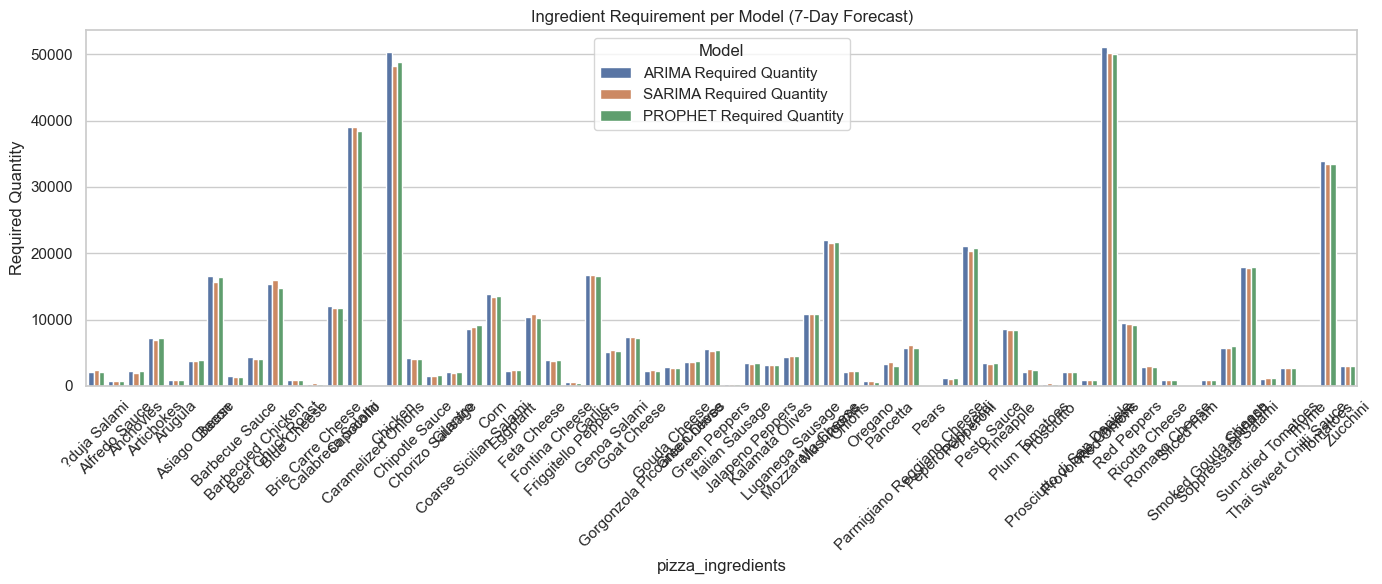

In [45]:
import matplotlib.pyplot as plt

# Melt the final_order dataframe for plotting
plot_df = final_order.melt(id_vars='pizza_ingredients',
                           var_name='Model',
                           value_name='Required Quantity')

plt.figure(figsize=(14, 6))
sns.barplot(data=plot_df, x='pizza_ingredients', y='Required Quantity', hue='Model')
plt.title('Ingredient Requirement per Model (7-Day Forecast)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
